# A test demo


# two lora mege & save

In [16]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
from lora_diffusion import monkeypatch_or_replace_lora, tune_lora_scale
import torch

# model_id = "stabilityai/stable-diffusion-2-1-base"
model_id = '/home/miaoqiaowei/.cache/StableDiff'

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda:1"
)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

torch.save(pipe, 'model.pt')
# exit()

T = 0.6

domain_a = 'art'
domain_b = 'clipart'

# the first
monkeypatch_or_replace_lora(pipe.unet, torch.load(f"../output/{domain_a}/lora_weight.pt"))
tune_lora_scale(pipe.unet, T)


# the second
monkeypatch_or_replace_lora(pipe.unet, torch.load(f"../output/{domain_b}/lora_weight.pt"))
tune_lora_scale(pipe.unet, T)


# save
torch.save(pipe, 'a+c.pt')


# test
torch.manual_seed(0)
prompt = f"a {domain_a.replace('_', ' ')} {domain_b.replace('_', ' ')} person."
image = pipe(prompt, num_inference_steps=50, guidance_scale=7).images[0]
image.save(f"../contents/{prompt}.jpg")
image

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


KeyboardInterrupt: 

In [19]:
# get test data set
from PIL import Image
from tqdm import tqdm
import os
import torch                                                                                                                                                                                                                     

def image_grid(imgs, rows=2, cols=2):                                                                                                                                                                                                         
    w, h = imgs[0].size                                                                                                                                                                                                                       
    grid = Image.new('RGB', size=(cols*w, rows*h))                                                                                                                                                                                            
                                                                                                                                                                                                                                              
    for i, img in enumerate(imgs):                                                                                                                                                                                                            
        grid.paste(img, box=(i%cols*w, i//cols*h))                                                                                                                                                                                            
    return grid 
def get_inputs(batch_size=1):                                                                                                                                                                                                                 
    generator = [torch.Generator("cuda").manual_seed(i) for i in range(batch_size)]                                                                                                                                                             
    prompts = batch_size * [prompt]                                                                                                                                                                                                             
    num_inference_steps = 20                                                                                                                                                                                                                    
    return {"prompt": prompts, "generator": generator, "num_inference_steps": num_inference_steps}
def get_batch_inputs(b, e):                                                                                                                                                                                                                 
    generator = [torch.Generator("cuda").manual_seed(i) for i in range(b,e)]                                                                                                                                                             
    prompts = (e-b) * [prompt]                                                                                                                                                                                                             
    num_inference_steps = 20                                                                                                                                                                                                                    
    return {"prompt": prompts, "generator": generator, "num_inference_steps": num_inference_steps}

device = 'cuda'
pipe = torch.load('p+s.pt').to(device)
root = '../dataset/PCAS_add/p+s'
domain_a = 'photo'
domain_b = 'sketch'
bs = 10
num = 300
num_inference_steps = 20 

for class_name in ['dog', 'elephant', 'giraffe', 'guitar', 'horse', 'house', 'person']:
    prompt = f"a {domain_a.replace('_', ' ')} {domain_b.replace('_', ' ')} {class_name}."  
    data_path = os.path.join(root, class_name)                                                                                                                                   
    if not os.path.exists(data_path):
        os.makedirs(data_path)
    for i in range(int(num/bs)):
        b = i*bs
        e = min(num, b+bs)

        images = pipe(**get_batch_inputs(b,e)).images                                                                                                                                                                            
        for idx, img in enumerate(images):
            img.save(f'{data_path}/{b+idx}.png')


FileNotFoundError: [Errno 2] No such file or directory: 'p+s.pt'

In [2]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
from lora_diffusion import monkeypatch_or_replace_lora, tune_lora_scale
import torch

def get_batch_inputs(b, e):                                                                                                                                                                                                                 
    generator = [torch.Generator("cuda").manual_seed(i) for i in range(b,e)]                                                                                                                                                             
    prompts = (e-b) * [prompt]                                                                                                                                                                                                             
    num_inference_steps = 50                                                                                                                                                                                                                    
    return {"prompt": prompts, "generator": generator, "num_inference_steps": num_inference_steps, 
            "guidance_scale":2}

model_id = "/home/miaoqiaowei/.cache/huggingface/models--stabilityai--stable-diffusion-2-1-base/snapshots/88bb1a46821197d1ac0cb54d1d09fb6e70b171bc"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda:3"
)
# pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

T = 0.1

# # domain_a = 'art'
# # domain_b = 'clipart'

# # the first
monkeypatch_or_replace_lora(pipe.unet, torch.load(f"/home/miaoqiaowei/d2d_lora/output/imagenet-100-fine*/lora_weight_e1999_s2000.pt"))
tune_lora_scale(pipe.unet, T)
# torch.save(pipe,'intra-use.pt')
# pipe = torch.load('intra-good.pt')
# test
# torch.manual_seed(0)
prompt = f"photo gila monster, Heloderma suspectum."
# image = pipe(prompt, num_inference_steps=20, guidance_scale=2).images[0]
# image.save(f"../contents/{prompt}.jpg")
# image
images = pipe(**get_batch_inputs(0,10)).images                                                                                                                                                                            
for idx, img in enumerate(images):
    img.save(f"../contents/_s-{idx}.png")

100%|██████████| 50/50 [00:15<00:00,  3.29it/s]


In [ ]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
from lora_diffusion import monkeypatch_or_replace_lora, tune_lora_scale
import torch

def get_batch_inputs(b, e):                                                                                                                                                                                                                 
    generator = [torch.Generator("cuda").manual_seed(i) for i in range(b,e)]                                                                                                                                                             
    prompts = (e-b) * [prompt]                                                                                                                                                                                                             
    num_inference_steps = 50                                                                                                                                                                                                                    
    return {"prompt": prompts, "generator": generator, "num_inference_steps": num_inference_steps, 
            "guidance_scale":2}

model_id = "/home/miaoqiaowei/.cache/huggingface/models--stabilityai--stable-diffusion-2-1-base/snapshots/88bb1a46821197d1ac0cb54d1d09fb6e70b171bc"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda:3"
)
# pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

T = 0.6

# # domain_a = 'art'
# # domain_b = 'clipart'

# # the first
monkeypatch_or_replace_lora(pipe.unet, torch.load(f"/home/miaoqiaowei/d2d_lora/output/imagenet-100-fine*/lora_weight_e1999_s2000.pt"))
tune_lora_scale(pipe.unet, T)
# torch.save(pipe,'intra-best.pt')
# pipe = torch.load('intra-good.pt')
# test
# torch.manual_seed(0)
prompt = f"photo green mamba."
# image = pipe(prompt, num_inference_steps=20, guidance_scale=2).images[0]
# image.save(f"../contents/{prompt}.jpg")
# image
images = pipe(**get_batch_inputs(0,10)).images                                                                                                                                                                            
for idx, img in enumerate(images):
    img.save(f"../contents/_s-{idx}.png")

100%|██████████| 50/50 [00:03<00:00, 15.05it/s]


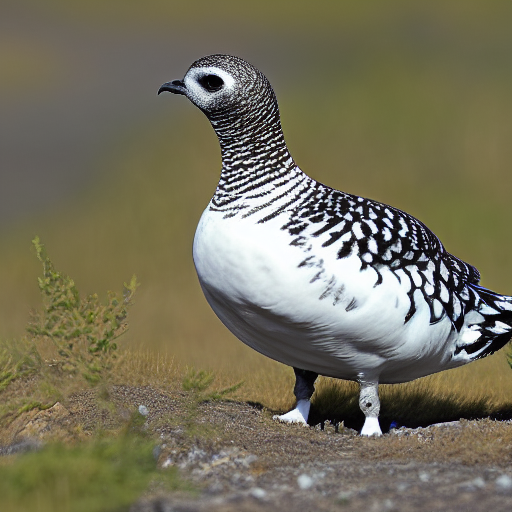

In [31]:
torch.manual_seed(4)
prompt = f"ptarmigan."
image = pipe(prompt, num_inference_steps=50, guidance_scale=7).images[0]
image.save(f"../contents/{prompt}.jpg")
image